In [79]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing

%matplotlib inline

In [67]:
df = pd.read_csv("train.csv")

In [68]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [69]:
df.index = pd.to_datetime(df['datetime']) # creating an index from the timestamp
df['year']= df.index.year # year
df['month'] = df.index.month # month
df['hours'] = df.index.hour # hours 
df['day'] = df.index.dayofweek # day of week (Monday=0, Sunday=6)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hours,day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,2011,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,2011,1,4,5


In [70]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hours,day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000,6.000000


In [71]:
df['workingday'].unique()

array([0, 1])

In [72]:
df['weather'].unique()

array([1, 2, 3, 4])

In [73]:
df['workingday'].unique()

array([0, 1])

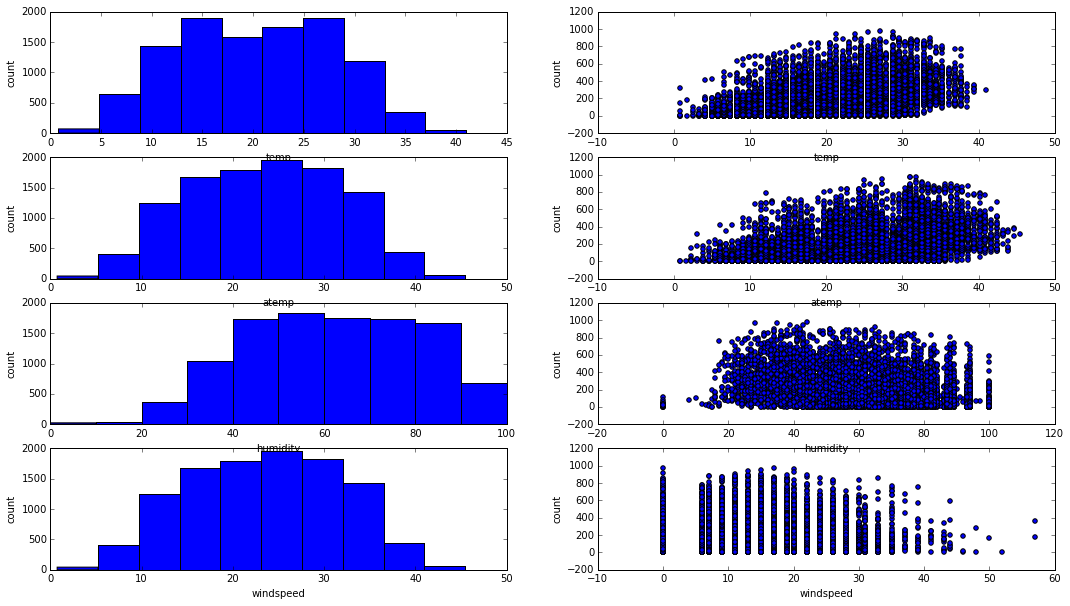

In [74]:
fig = plt.figure(figsize=(18, 10), dpi=80)
ax1 = fig.add_subplot(421)
ax1.set_xlabel("temp")
ax1.set_ylabel("count")
ax1.hist(df.temp)
ax2 = fig.add_subplot(422)
ax2.set_xlabel("temp")
ax2.set_ylabel("count")
ax2.scatter(df['temp'], df['count'])

ax1 = fig.add_subplot(423)
ax1.set_xlabel("atemp")
ax1.set_ylabel("count")
ax1.hist(df.atemp)
ax2 = fig.add_subplot(424)
ax2.set_xlabel("atemp")
ax2.set_ylabel("count")
ax2.scatter(df['atemp'], df['count'])

ax1 = fig.add_subplot(425)
ax1.set_xlabel("humidity")
ax1.set_ylabel("count")
ax1.hist(df.humidity)
ax2 = fig.add_subplot(426)
ax2.set_xlabel("humidity")
ax2.set_ylabel("count")
ax2.scatter(df['humidity'], df['count'])

ax1 = fig.add_subplot(427)
ax1.set_xlabel("windspeed")
ax1.set_ylabel("count")
ax1.hist(df.atemp)
ax2 = fig.add_subplot(428)
ax2.set_xlabel("windspeed")
ax2.set_ylabel("count")
ax2.scatter(df['windspeed'], df['count'])


In [75]:
X = df[[1,2,3,4,5,6,7,8,12,13,14,15]].values
print "Shape of all features: ", X.shape
Y = df[[11]].values
print "Shape of labels: ", Y.shape

Shape of all features:  (10886, 12)
Shape of labels:  (10886, 1)


In [76]:
test_data, test_labels = X[9000:], Y[9000:]
dev_data, dev_labels = X[7000:9000], Y[7000:9000]
train_data, train_labels = X[:7000], Y[:7000]
print 'train data shape: ', train_data.shape
print 'train label shape:', train_labels.shape
print 'dev data shape: ', dev_data.shape
print 'dev label shape:', dev_labels.shape
print 'test data shape: ', test_data.shape
print 'test labels shape:', test_labels.shape

train data shape:  (7000, 12)
train label shape: (7000, 1)
dev data shape:  (2000, 12)
dev label shape: (2000, 1)
test data shape:  (1886, 12)
test labels shape: (1886, 1)


In [86]:
scaler = preprocessing.StandardScaler().fit(train_data)
test_data_scaled = scaler.transform(test_data)
dev_data_scaled = scaler.transform(dev_data) 
train_data_scaled = scaler.transform(train_data) 

In [89]:
# Ordinary Least Squares
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_data_scaled, train_labels)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(dev_data_scaled) - dev_labels) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 - Variance score (Dev): %.2f' % regr.score(dev_data_scaled, dev_labels))
print('R^2 - Variance score (Test): %.2f' % regr.score(test_data_scaled, test_labels))

('Coefficients: \n', array([[  1.06689222,  -0.90498218,  -0.37811397,  -4.86918089,
        -13.4117296 ,  64.24582104, -27.29037755,   3.98950133,
         32.95579207,  21.86285872,  42.22896136,   1.54590525]]))
('Intercept: \n', array([ 150.72271429]))
Residual sum of squares: 35049.58
R^2 - Variance score (Dev): 0.28
R^2 - Variance score (Test): 0.26
